In [1]:
import json

import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import numpy as np

2022-09-02 23:34:57.863895: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
def _load_json(json_file):
    with open(json_file) as f:
        data = json.load(f)
    return data

def load_categories(json_file):
    data = _load_json(json_file)
    cat_map = {categ['id']: categ['name'].capitalize() for categ in data['categories']}
    
    return cat_map

In [3]:
cat_map = load_categories('/data/fagner/training/bags_paper/data/wcs_images_20211210ufam_predsample.json')

In [4]:
data_preds = pd.DataFrame({'model': ['Resnet50', 'Resnet50', 'Resnet50', 'Resnet50',
                                     'Resnet50 (SSB)', 'Resnet50 (SSB)', 'Resnet50 (SSB)', 'Resnet50 (SSB)',
                                     'Swin-S', 'Swin-S', 'Swin-S', 'Swin-S',],
                           'pred': [0, 14, 21, 76,
                                    0, 14, 3, 76,
                                    181, 14, 302, 76,],
                           'conf': [74.20, 78.82, 24.80, 97.35,
                                   74.20, 78.82, 22.60, 98.96,
                                   92.77, 91.40, 73.49, 99.88,],
                           'label': [181, 14, 306, 76,
                                    181, 14, 306, 76,
                                    181, 14, 306, 76,],
                           'id': ['1656.jpg', '1937.jpg', '1824.jpg', '0234.jpg',
                                 '1656.jpg', '1937.jpg', '1824.jpg', '0234.jpg',
                                 '1656.jpg', '1937.jpg', '1824.jpg', '0234.jpg',]})
data_preds['conf'] = data_preds['conf'] / 100
data_preds['pred'] = data_preds['pred'].map(cat_map)
data_preds['label'] = data_preds['label'].map(cat_map)
data_preds['color'] = data_preds.apply(lambda x: '#ccffcc' if x['label'] == x['pred'] else '#ffcccc', axis=1)
model_sort = {
        'Label': 3,
        'Resnet50': 2,
        'Resnet50 (SSB)': 1,
        'Swin-S': 0
    }
data_preds = data_preds.sort_values(by=['model'], key=lambda x: x.map(model_sort))

In [5]:
def plot_bar(df, title_extra='', save_file=None):
    fig = plt.figure(figsize=(4, 2))
    plt.barh(df['model'], df['conf'], color=df['color'], linewidth=0.2, edgecolor='k')
    ax = plt.gca()
    ax.set_xlim([0, 1.0])
    ax.set_xlabel('Confidence score')
    
    plt.yticks(fontsize=12)
    yticks = ax.get_yticks()
    ax.text(0, len(df), ' %s %s' % (df['label'].iloc[0], title_extra),
                horizontalalignment="left",
                verticalalignment="center",
                fontsize=14)
    ax.text(0, len(df), 'Label:',
                horizontalalignment="right",
                verticalalignment="center",
                fontsize=14)
    for y, pred in zip(yticks, df['pred']):
        ax.text(0.03, y, pred,
                horizontalalignment="left",
                verticalalignment="center",
                fontsize=12)
    
    if save_file is not None:
        plt.savefig(save_file, bbox_inches='tight')
    plt.show()

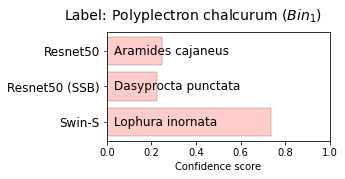

In [6]:
plot_bar(data_preds[data_preds.id=='1824.jpg'],
         '($Bin_1$)',
         '../data/0329_1824_bin1_preds.pdf')

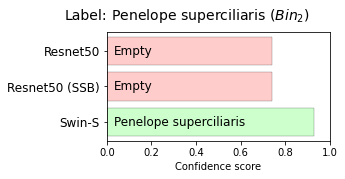

In [7]:
plot_bar(data_preds[data_preds.id=='1656.jpg'],
         '($Bin_2$)',
         '../data/0082_1656_bin2_preds.pdf')

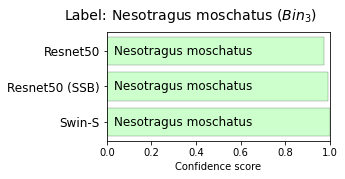

In [8]:
plot_bar(data_preds[data_preds.id=='0234.jpg'],
         '($Bin_3$)',
         '../data/0468_0234_bin3_preds.pdf')

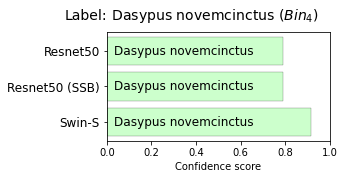

In [9]:
plot_bar(data_preds[data_preds.id=='1937.jpg'],
         '($Bin_4$)',
         '../data/0174_1937_bin4_preds.pdf')